## Ejercicio - Regresión Viviendas Barcelona

- Utilizando el dataset de publicaciones de venta de viviendas en Barcelona _**viviendas_barcelona.parquet**_, entrena un modelo de regresión lineal múltiple que sea capaz de calcular el precio de venta:

    - Antes de crear el modelo y entrenarlo, haz un **EDA** de los datos.
        - ¿Qué columnas pueden ser las más importantes?
        - ¿Como se distribuyen los precios?
        - ¿Qué columnas sería factible limpiar?
        - ¿Qué significan los **np.nan**?
     
    - Cuando entiendas bien los datos con los que estás tratando, puedes proceder a realizar un preprocesamiento:
        - Elimina duplicados.
        - Elimina columnas innecesarias
        - Trata los valores perdidos **np.nan**.
        - Maneja los outliers como consideres.
        - Realiza transformaciones a los datos que consideres necesarias.
        - Codifica los datos categóricos para que el modelo los entienda (pásalos a números).
        - Considera normalizar los datos antes de utilizarlos para el entreno.
        
    - Entrena el modelo con un subconjunto de 70-80% del dataset.
      
    - Utiliza los datos restantes para comprobar cómo de bueno es el modelo:
        - Calcula **R2**, **MAE** y **MSE**.
        
- Importa las librerías que vayas a necesitar.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelo
from sklearn.linear_model import LinearRegression

# Herramientas de preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, TargetEncoder, OneHotEncoder

# Split
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# pip install pyarrow
df = pd.read_parquet("../Data/viviendas_barcelona.parquet")

In [2]:
df.drop(['id_1', 'id_2', 'updated', 'timestamp', 'province', 'location', 'Referencia'], axis=1, inplace=True)

In [3]:
# df['id_2'].duplicated().sum()

In [4]:

#df["agency"].nunique()
#df.describe(include='all').T
#df.info()
#df.columns

# Posibles columnas a descartar:
# 'id_1', 'id_2', 'updated', 'timestamp', 'province', 'location', 'Referencia', 

# df.drop(['id_1', 'id_2', 'updated', 'timestamp', 'province', 'location', 'Referencia'])
# Tipo de casa, title

In [5]:
df.shape

(27479, 18)

In [6]:
df.head()

,price,title,lat,lng,agency,Superficie construida,Emisiones,Clasificación,Baños,Consumo,Habitaciones,Antigüedad,Garaje,Terraza,Se aceptan mascotas,Ascensor,Tipo de casa,Superficie útil
0,52000.0,"Piso en venta en Avenida Casetes, nº 33",41.348350,1.701970,Inmuebles de Aliseda Inmobiliaria,88 m²,A B C D E F G,Pendiente de completar,1,A B C D E F G,3,None,None,None,None,None,None,None
1,315000.0,Casa adosada en venta en Vilafranca del Penedes,41.276503,1.652229,Inmuebles de Engel & Völkers Barcelona,179 m²,None,No indicado,2,None,4,None,1,Terraza,None,None,Adosada,None
2,650000.0,Casa unifamiliar en venta en Sant Sadurní d'Anoia,41.426682,1.792630,Inmuebles de SAFTI ESPAÑA,253 m²,63 Kg CO2/m2 año A B C D E F G,Disponible,2,None,5,None,2,Terraza,None,None,Unifamiliar,220 m²
3,315000.0,Casa en venta en Carrer de Sant Pere Molanta,41.318658,1.754891,Inmuebles de ALARCON PROPIEDADES,198 m²,72 Kg CO2/m2 año A B C D E F G,Disponible,2,None,3,Entre 30 y 50 años,1,Terraza,Se aceptan mascotas,None,None,100 m²
4,209900.0,"Chalet en venta en Calle Carrer Serral Llarg, ...",41.369700,1.876770,Inmuebles de FINCAS MARINA,494 m²,A B C D E F G,Disponible,2,None,3,None,None,Terraza,None,None,None,398 m²


In [7]:
print(df.head())

      price                                              title        lat  \
0   52000.0            Piso en venta en Avenida Casetes, nº 33  41.348350   
1  315000.0    Casa adosada en venta en Vilafranca del Penedes  41.276503   
2  650000.0  Casa unifamiliar en venta en Sant Sadurní d'Anoia  41.426682   
3  315000.0       Casa en venta en Carrer de Sant Pere Molanta  41.318658   
4  209900.0  Chalet en venta en Calle Carrer Serral Llarg, ...  41.369700   

        lng                                  agency Superficie construida  \
0  1.701970       Inmuebles de Aliseda Inmobiliaria                 88 m²   
1  1.652229  Inmuebles de Engel & Völkers Barcelona                179 m²   
2  1.792630               Inmuebles de SAFTI ESPAÑA                253 m²   
3  1.754891        Inmuebles de ALARCON PROPIEDADES                198 m²   
4  1.876770              Inmuebles de FINCAS MARINA                494 m²   

                           Emisiones             Clasificación Baños  \
0 

      price                                              title        lat  \
0   52000.0            Piso en venta en Avenida Casetes, nº 33  41.348350   
1  315000.0    Casa adosada en venta en Vilafranca del Penedes  41.276503   
2  650000.0  Casa unifamiliar en venta en Sant Sadurní d'Anoia  41.426682   
3  315000.0       Casa en venta en Carrer de Sant Pere Molanta  41.318658   
4  209900.0  Chalet en venta en Calle Carrer Serral Llarg, ...  41.369700   

        lng                                  agency Superficie construida  \
0  1.701970       Inmuebles de Aliseda Inmobiliaria                 88 m²   
1  1.652229  Inmuebles de Engel & Völkers Barcelona                179 m²   
2  1.792630               Inmuebles de SAFTI ESPAÑA                253 m²   
3  1.754891        Inmuebles de ALARCON PROPIEDADES                198 m²   
4  1.876770              Inmuebles de FINCAS MARINA                494 m²   

                           Emisiones             Clasificación Baños  \
0                      A B C D E F G    Pendiente de completar     1   
1                               None               No indicado     2   
2    63 Kg CO2/m2 año  A B C D E F G                Disponible     2   
3    72 Kg CO2/m2 año  A B C D E F G                Disponible     2   
4                      A B C D E F G                Disponible     2   

            Consumo Habitaciones           Antigüedad Garaje  Terraza  \
0     A B C D E F G            3                 None   None     None   
1              None            4                 None      1  Terraza   
2              None            5                 None      2  Terraza   
3              None            3   Entre 30 y 50 años      1  Terraza   
4              None            3                 None   None  Terraza   

   Se aceptan mascotas Ascensor  Tipo de casa Superficie útil  
0                 None     None          None            None  
1                 None     None       Adosada            None  
2                 None     None   Unifamiliar          220 m²  
3  Se aceptan mascotas     None          None          100 m²  
4                 None     None          None          398 m²  


In [8]:
df['Superficie construida'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
27474    False
27475    False
27476    False
27477    False
27478    False
Name: Superficie construida, Length: 27479, dtype: bool

In [9]:
df['Superficie construida'].value_counts()


Superficie construida
80 m²       489
75 m²       469
90 m²       431
70 m²       425
100 m²      389
           ... 
1.024 m²      1
1.109 m²      1
621 m²        1
1.275 m²      1
792 m²        1
Name: count, Length: 937, dtype: int64

In [10]:
df[['Superficie construida', 'Superficie útil']].head(40)


,Superficie construida,Superficie útil
0,88 m²,None
1,179 m²,None
2,253 m²,220 m²
3,198 m²,100 m²
4,494 m²,398 m²
5,1.260 m²,1.260 m²
6,1.275 m²,1.147 m²
7,46 m²,None
8,61 m²,44 m²
9,204 m²,None


In [11]:
#Superficie
# método para quedarnos con los valores numéricos y rellenar los nulos
# Superficie '1.250 m2' --> 1250
def extraer_superficie_num(superficie):
    try:
        return int(superficie.split()[0].replace('.',''))
    except:
        return np.nan    
        
df['Superficie construida'] = df['Superficie construida'].apply(extraer_superficie_num)  
median = df['Superficie construida'].median()  
df['Superficie construida'] = df['Superficie construida'].fillna(median).round(0).astype(int)


In [12]:
df['Superficie construida'].value_counts()


Superficie construida
108     660
80      489
75      469
90      431
70      425
       ... 
1024      1
1109      1
621       1
1275      1
792       1
Name: count, Length: 937, dtype: int64

In [13]:
df['Superficie útil'].value_counts()

Superficie útil
70 m²       544
80 m²       542
90 m²       535
60 m²       478
75 m²       472
           ... 
491 m²        1
1.250 m²      1
717 m²        1
612 m²        1
792 m²        1
Name: count, Length: 647, dtype: int64

In [14]:
# opcion 1 a nivel de todo el dataframe
# opcion 2 usar filtro 

In [15]:
# Arreglar la columna Superficie útil
# Convertir a numérico la colimna Superficie útil y rellenar sus nulos
df['Superficie útil'] = df['Superficie útil'].apply(extraer_superficie_num)  

def fill_superficie_util(fila):
    if pd.isnull(fila['Superficie útil']):
        return fila['Superficie construida'] * 0.85 # Asumimos que la superficie útil es un 15% menor que la superficie total    
    else:
        return fila['Superficie útil']
    
df['Superficie útil'] = df.apply(fill_superficie_util, axis=1)    

In [16]:
df['Superficie útil'].value_counts()

Superficie útil
70.00      544
80.00      542
90.00      535
91.80      533
60.00      478
          ... 
497.25       1
1049.75      1
519.00       1
542.30       1
1574.20      1
Name: count, Length: 1386, dtype: int64

In [17]:
df[['Superficie construida', 'Superficie útil']].isna().sum()

Superficie construida    0
Superficie útil          0
dtype: int64

Las emisiones nos aparecen en 2 grandes grupos ( en ppio)

Unos empiezan con el valor numérico y otros con las letras

In [18]:
# Emisiones (se podría eliminar si sabemos que no afecta al precio en la realidad)
def extraer_emisiones_num(emision):
    try:
        return float(emision.strip().split()[0].replace('.','.'))
    except:
        return np.nan

df['Emisiones'] = df['Emisiones'].apply(extraer_emisiones_num)
median = df['Emisiones'].median()
df['Emisiones'] = df['Emisiones'].fillna(median).round(2).astype(float)   
# Vamos a decidir rellenar los Nan con una mediana, porque son demasiados valores nulos (14057) 
    


In [19]:
df[['Emisiones']].isna().sum()

Emisiones    0
dtype: int64

In [20]:
print(df.head())

      price                                              title        lat  \
0   52000.0            Piso en venta en Avenida Casetes, nº 33  41.348350   
1  315000.0    Casa adosada en venta en Vilafranca del Penedes  41.276503   
2  650000.0  Casa unifamiliar en venta en Sant Sadurní d'Anoia  41.426682   
3  315000.0       Casa en venta en Carrer de Sant Pere Molanta  41.318658   
4  209900.0  Chalet en venta en Calle Carrer Serral Llarg, ...  41.369700   

        lng                                  agency  Superficie construida  \
0  1.701970       Inmuebles de Aliseda Inmobiliaria                     88   
1  1.652229  Inmuebles de Engel & Völkers Barcelona                    179   
2  1.792630               Inmuebles de SAFTI ESPAÑA                    253   
3  1.754891        Inmuebles de ALARCON PROPIEDADES                    198   
4  1.876770              Inmuebles de FINCAS MARINA                    494   

   Emisiones             Clasificación Baños           Consumo Habit

In [21]:
df["agency"].unique()

array(['Inmuebles de Aliseda Inmobiliaria',
       'Inmuebles de Engel & Völkers Barcelona',
       'Inmuebles de SAFTI ESPAÑA', ..., 'ARTURO C', 'Propietario',
       'Alicia'], dtype=object)

In [22]:
df['agency'].isna().sum()

np.int64(350)

In [23]:
pd.set_option('display.max_rows', None)
print(df['agency'].value_counts())


agency
Inmuebles de Engel & Völkers Barcelona                                      2187
Inmuebles de Aliseda Inmobiliaria                                            493
Inmuebles de LA CASA AGENCY                                                  342
Inmuebles de NOVA FINQUES                                                    333
Inmuebles de donpiso Central                                                 332
Inmuebles de COLIBREE                                                        332
Inmuebles de GROCASA                                                         323
Inmuebles de LUCAS FOX BARCELONA                                             296
Inmuebles de PREMIUM HOUSES                                                  273
Inmuebles de SBD IMMOBLES                                                    269
Inmuebles de Servihabitat Servicios Inmobiliarios                            250
Inmuebles de VIVANTIAL                                                       249
Inmuebles de IAD ESPA

In [24]:
# agencia
# Estrategia 1: crear una columna agency_size que represente ul número de propiedades en venta para esa agency (más rápida)
# Estrategia 2: crear una columna con el percentil de tamao de agencia en base al número de propiedades en venta
# Estrategia 3: discretizarla en grupos: propietario individual, agencia pequea, agencia mediana, agencia grande
# Estrategia 4: precio medio de las casas de la agencia (pero estamos dando precios para luego predecir el perecio, puede dar sesgos)

df['agency'] = df['agency'].fillna('Other') # Rellena los nulos con la palabra 'Other' o 'Otros'
df['agency_size'] = df['agency'].map(df['agency'].value_counts()) # Estrategia 1

In [25]:
pd.reset_option('display.max_rows')
df[['agency', 'agency_size']]

,agency,agency_size
0,Inmuebles de Aliseda Inmobiliaria,493
1,Inmuebles de Engel & Völkers Barcelona,2187
2,Inmuebles de SAFTI ESPAÑA,95
3,Inmuebles de ALARCON PROPIEDADES,30
4,Inmuebles de FINCAS MARINA,31
...,...,...
27474,Inmuebles de Engel & Völkers Barcelona,2187
27475,Inmuebles de ESPAI HABITAT,28
27476,Inmuebles de Engel & Völkers Barcelona,2187
27477,Inmuebles de AGC FINQUES,17


In [26]:
# Baños, Habitaciones , Garaje , Terraza, Ascensor , Tipo de casa, Clasificación





In [27]:
df['Ascensor'].unique()

array([None, 'Ascensor', ' Con ascensor', ' Ascensor', ' Del pis al pk',
       ' 2', ' Comedor y habitación', ' 2 ascensores en finca',
       ' En proceso', ' No',
       ' Ascensor disponible para acceder al terrado a tend',
       ' 2 ascensores', ' 4 personas 300kgs', ' Comunica con el parking',
       ' En perfecto estado', ' Solo para los que viven en la 3 planta.',
       ' 1 o 2 personas', ' Amplio para silla de ruedas',
       ' Entre rellano', ' 4 personas 320kgs', ' 3 ( hay 3 escaleras)',
       ' Si amplio', ' Si, escalera b', ' 2 ascensores ( escalera a)',
       ' 3 personas 300kgs', ' 4 ascensores', ' 4', ' Dos ascensores',
       ' 3 ascensores en la finca', ' En proyecto',
       ' La caja de gero termo-acustico para reducir ruidos', ' Emplio',
       ' Pre-instalación', ' Si', ' Privado sólo para los áticos.',
       ' Conecta parking, viviendas y trasteros',
       ' Por uno cada siete vecinos', ' De uso exclusivo para los áticos',
       ' Finca con ascensor', ' In

In [28]:
# creamos la columna ascensor_cat: con ascensor, sin ascensor, otros
# def categorizar_ascensor(valor):
def binarizar_ascensor(valor):
    if pd.isnull(valor):
        #return 'Otros' # lo reemplazo por un cero
        return '0'
    # mapa de valores a categorías
    valor = valor.strip().lower()
    
    mapa_ascensor = {
        None: 0,
        'ascensor': 1,
        'con ascensor': 1,
        'del pis al pk': 1,
        '2': 1,
        'comedor y habitación': 1,
        '2 ascensores en finca': 1,
        'en proceso': 1,
        'no': 0,
        'ascensor disponible para acceder al terrado a tend': 1,
        '2 ascensores': 1,
        '4 personas 300kgs': 1,
        'comunica con el parking': 1,
        'en perfecto estado': 1,
        'solo para los que viven en la 3 planta.': 1,
        '1 o 2 personas': 1,
        'amplio para silla de ruedas': 1,
        'entre rellano': 1,
        '4 personas 320kgs': 1,
        '3 ( hay 3 escaleras)': 1,
        'si amplio': 1,
        'si, escalera b': 1,
        '2 ascensores ( escalera a)': 1,
        '3 personas 300kgs': 1,
        '4 ascensores': 1,
        '4': 1,
        'dos ascensores': 1,
        '3 ascensores en la finca': 1,
        'en proyecto': 1,
        'la caja de gero termo-acustico para reducir ruidos': 1,
        'emplio': 1,
        'pre-instalación': 1,
        'si': 1,
        'privado sólo para los áticos.': 0,
        'conecta parking, viviendas y trasteros': 1,
        'por uno cada siete vecinos': 1,
        'de uso exclusivo para los áticos': 0,
        'finca con ascensor': 1,
        'interior': 1,
        'no, solo es un primero': 0,
        'no hay ascensor': 0,
        'dos': 1,
        '4 por rellano': 1,
        'dos por planta': 1,
        'de 4 por planta': 1,
        'proyecto de ascensor aprobado': 1,
        'true': 1,
        'hasta el parquing': 1,
        'ascensor renovado moderno': 1,
        'nuevo': 1,
        'al ser planta baja, no hace uso de él.': 0,
        'solo 3 vecinos': 0,
        'directo a la vivienda': 1,
        '2 ascensores en la finca': 1,
        'reformado': 1   
    }
    #return mapa_ascensor.get(valor, 'Otros')
    return mapa_ascensor.get(valor, 0)

# df['Ascensor'].apply(categorizar_ascensor).value_counts()
# df['Ascensor'] = df['Ascensor'].apply(categorizar_ascensor)
df['Ascensor'] = df['Ascensor'].apply(binarizar_ascensor).astype(np.int8)


In [29]:
df['Ascensor'].value_counts()

Ascensor
0    15639
1    11840
Name: count, dtype: int64

In [30]:
df['Terraza'].unique()
# Tiene demasiados valores variados, nos saltamos esta columna

array([None, 'Terraza', ' 30m2', ' Terraza de 120 metros cuadrados.',
       ' 2 en planta baja y un solarium', ' 2', ' 2 grandes', ' De 15m2',
       ' Jardin de 41m2 y terraza de 19 m2', ' 6', ' De 31 m2', ' 5',
       ' En bajocubierta de 20 m2', ' De 22 m2', ' 60',
       ' En planta superior de 8m2', ' En dúplex', ' Porche',
       ' Patios y huertos', ' 47m2 con muy buenas vistas, es esquinera',
       ' 4', ' 25m²', ' 2 terrazas y patio', ' De 150m2',
       ' De 43m2 y con unas vistas preciosas', ' En comedor', ' De 20m2',
       ' No acristalada', ' 26m2', ' 2 patios',
       ' De 14 m2 con vistas a la piscina', ' Patio interior', ' 40.00',
       ' 25 m2 de terraza principal', ' A pie de salón-comedor principal',
       ' Orientado a la zona comunitaria', ' 30',
       ' 10 m2 de terraza principal', ' Balcones franceses', ' 20 m2',
       ' Muy soleada', ' 3', ' 177m2', ' 16,60m2', ' 16',
       ' 35 m2 de terraza principal', ' Dos terrazas', ' 35', ' 7 metros',
       ' En l

In [31]:
df['Terraza'].value_counts()

Terraza
Terraza            11350
 No acristalada      148
 2                    33
 No                   22
 Comunitaria          22
                   ...  
 300.00                1
 26m.                  1
 50 m2                 1
 50.00                 1
 Con vistas            1
Name: count, Length: 796, dtype: int64

In [32]:
# Hacemos un método para binarizar la terraza, simplemente elegimos 1 si hay algo escrito y 0 si no
def binarizar_terraza(valor):
    #print(valor)
    try:
        if pd.isnull(valor) or valor is None or len(valor) == 0 or 'no' in valor.strip().lower():
            return False
        else:
            return True
    except:
        return False
        
# df['Terraza'].apply(binarizar_terraza)   
df['Terraza'] = df['Terraza'].apply(binarizar_terraza) 
df['Terraza'].value_counts()   

     

Terraza
False    14886
True     12593
Name: count, dtype: int64

In [33]:
df['Baños'].value_counts()

Baños
2     10245
1     10079
3      3640
4      1245
5       484
6       229
7       114
8        57
10       21
9        21
11       13
12       13
16        4
17        4
13        4
14        2
46        2
39        2
22        1
-1        1
20        1
33        1
18        1
15        1
Name: count, dtype: int64

In [34]:
# cuando el numero de baños sea mayor o igual a 9 le ponemos como si tuviera solo 9 baños 
def categorizar_bathroom(valor):
    if pd.isnull(valor):
        return 0
    valor = int(valor)

    if valor <= 0:
        return 0
    if valor >= 9:
        return 9
    else:
        return valor  
    
#df['Baños'].apply(categorizar_bathroom).value_counts()  
df['Baños'] = df['Baños'].apply(categorizar_bathroom) 
  

In [35]:
# Habitaciones
df['Habitaciones'].value_counts()

Habitaciones
3     10668
4      6398
2      3917
5      2278
1      1058
6       910
7       436
8       181
9       106
10       72
11       36
12       34
14       17
20       13
13       11
15       10
16        9
17        3
46        3
25        2
50        2
19        2
37        2
26        1
22        1
18        1
Name: count, dtype: int64

In [36]:
# cuando el numero de habitaciones sea mayor o igual a 9 le ponemos como si tuviera solo 9 habitaciones 
def categorizar_habitaciones(valor):
    if pd.isnull(valor):
        return 0
    valor = int(valor)

    if valor <= 0:
        return 0
    if valor >= 11:
        return 11
    else:
        return valor  
    
df['Habitaciones'] = df['Habitaciones'].apply(categorizar_habitaciones).astype(int)

In [37]:
df['Habitaciones'].apply(categorizar_habitaciones).value_counts()  


Habitaciones
3     10668
4      6398
2      3917
5      2278
0      1308
1      1058
6       910
7       436
8       181
11      147
9       106
10       72
Name: count, dtype: int64

In [38]:
# quitamos los que tienen precio null
df_to_pred = df[df['price'].isna()] # guardar filas con price nan por si se quieren predecir en un futuro
df = df[~df['price'].isna()]

In [39]:
df_to_eda = df[[
    'Habitaciones', 'Baños', 'Terraza', 'Ascensor',
    'lat', 'lng', 'agency_size', 'Superficie construida', 'Superficie útil',
    #'agency_size', 'Superficie construida', 'Superficie útil',
    'Emisiones', 'price'
]]

In [40]:
df_to_eda = df_to_eda.dropna()

In [41]:
# para obtener las ubicaciones a partir de latitud y longitud o al revés:
# openstreemaps
# nominatim
# utilizar APIs para recuperar las coordenadas faltantes
# Goggle Maps API de Google Cloud PLatform : nos da un crédito que podemos usar para esto


In [42]:
#sns.pairplot(df_to_eda.sample(100))
#sns.pairplot(df_to_eda)

In [43]:
df_to_eda.dtypes

Habitaciones               int64
Baños                      int64
Terraza                     bool
Ascensor                    int8
lat                      float64
lng                      float64
agency_size                int64
Superficie construida      int64
Superficie útil          float64
Emisiones                float64
price                    float64
dtype: object

<Axes: >

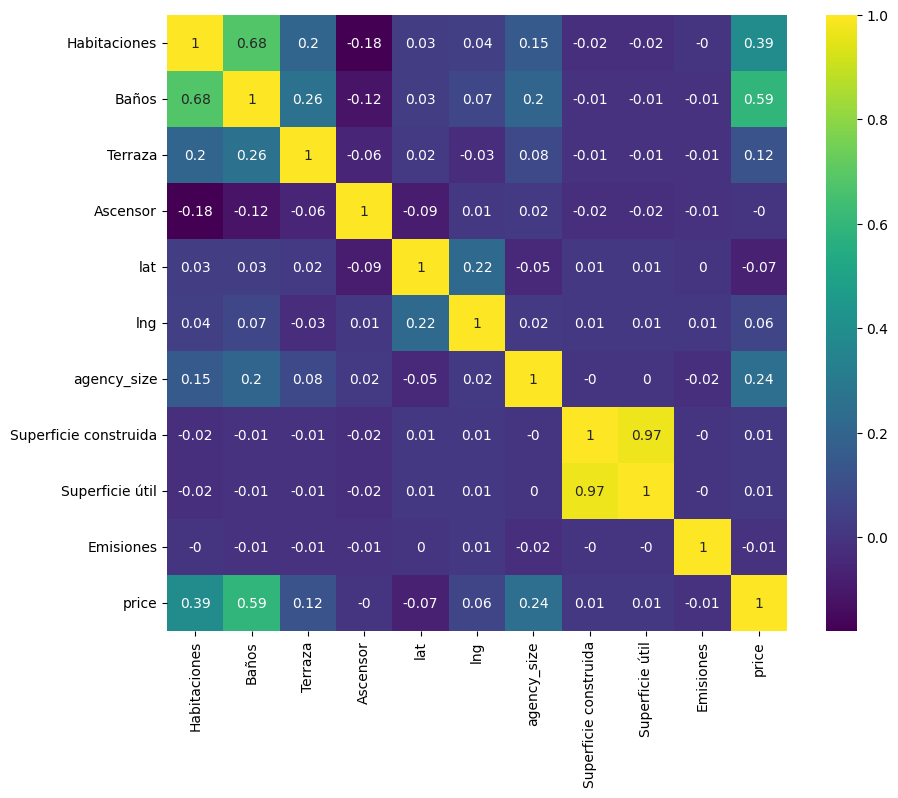

In [44]:
# heatmap de correlación 
plt.figure(figsize=(10, 8))
sns.heatmap(df_to_eda.corr().round(2), annot=True,cmap='viridis' )

In [45]:
# nos quedaremos con el datafrtam siguiente:
df_to_model = df[[
    'Habitaciones', 'Baños', 'Terraza',
    'agency_size', 'price'  
]]

In [46]:
X = df_to_model.drop('price', axis=1)
y = df_to_model['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [48]:
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])                           

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models= {
    'RLM': LinearRegression(),
    'KNN k = 3': KNeighborsRegressor(n_neighbors=3),
    'KNN k = 5': KNeighborsRegressor(n_neighbors=5),
    'KNN k = 7': KNeighborsRegressor(n_neighbors=7),
    'KNN k = 9': KNeighborsRegressor(n_neighbors=9),
    'DTT depth = 5': DecisionTreeRegressor(max_depth=5),
    'DT depth = no': DecisionTreeRegressor(),
    'RF 100': RandomForestRegressor(),
    'RF 150': RandomForestRegressor(n_estimators=150),
    'SVR 1': SVR(C=1),
    'SVR 10': SVR(C=10),
    'SVR 1_000': SVR(C=1000),
    'SVR 1_000_000': SVR(C=1000000),
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    df_resultados.loc[len(df_resultados)] = [name, r2, mae, rmse, mape]


In [50]:
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,KNN k = 9,0.458828,176817.572859,397676.289215,0.459054
3,KNN k = 7,0.453544,177997.033882,399613.075172,0.460183
2,KNN k = 5,0.440558,182642.380002,404333.398854,0.477722
5,DTT depth = 5,0.438411,192512.273333,405108.513015,0.533485
0,RLM,0.385515,216417.303020,423757.849745,0.625065
1,KNN k = 3,0.368901,192688.352202,429448.204671,0.494235
8,RF 150,0.351357,189056.734370,435376.390951,0.493356
7,RF 100,0.330488,189647.700909,442324.583439,0.495243
12,SVR 1_000_000,0.095230,208927.657920,514198.771359,0.462060
6,DT depth = no,-0.009316,204410.966748,543094.669673,0.508331


In [51]:
# Hay que añadir los garages
 